In [1]:
from llama_index.readers.file.base import (
    DEFAULT_FILE_EXTRACTOR, 
    ImageParser,
)
from llama_index.response.notebook_utils import (
    display_response, 
    display_image,
)
from llama_index.indices.query.query_transform.base import (
    ImageOutputQueryTransform,
)


In [2]:
# NOTE: By default, image parser converts image into text and discard the original image.  
#       Here, we explicitly keep both the original image and parsed text in an image document
image_parser = ImageParser(keep_image=True, parse_text=True)
file_extractor = DEFAULT_FILE_EXTRACTOR
file_extractor.update(
{
    ".jpg": image_parser,
    ".png": image_parser,
    ".jpeg": image_parser,
})

# NOTE: we add filename as metadata for all documents
filename_fn = lambda filename: {'file_name': filename}

2023-03-17 17:32:23.285110: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
INFO:root:> [build_index_from_documents] Total LLM token usage: 0 tokens
INFO:root:> [build_index_from_documents] Total embedding token usage: 219 tokens
INFO:root:> [query] Total LLM token usage: 357 tokens
INFO:root:> [query] Total embedding token usage: 25 tokens


**`Final Response:`** The account name written in the image is @engin_yo and the year and month they started Twitter is 2020. The icon color is blue.

<img src="data/twitter_image_capture.png" width="400" />

---

**`Source Node 1/1`**

**Document ID:** d8a9d66a-7329-40e0-878a-f2f367798234<br>**Similarity:** 0.7777677640958081<br>**Text:** file_name: data/twitter_image_capture.png

<s_menu><s_nm> @engin_yo</s_nm><s_num> APN AII AWS Cer...<br>**Image:**

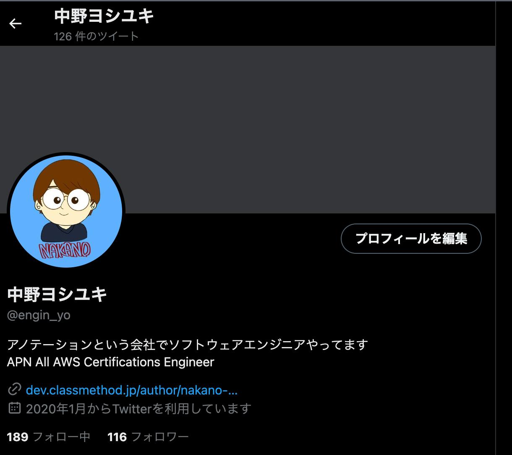

In [3]:
from llama_index import GPTSimpleVectorIndex, SimpleDirectoryReader
from llama_index.indices.query.query_transform.base import (
    ImageOutputQueryTransform,
)
from llama_index.response.notebook_utils import (
    display_response, 
    display_image,
)

imageReader = SimpleDirectoryReader(
    input_dir='data/',
    file_extractor=file_extractor, 
    file_metadata=filename_fn,
)

documents = imageReader.load_data()

index = GPTSimpleVectorIndex(documents)

question = "Tell me the account name written in the image and what year and month you started Twitter. What color is the icon? "

answer = index.query(question, query_transform=ImageOutputQueryTransform(width=400))
display_response(answer)